In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# データの読み込み
df = pd.read_csv("mpgdata.csv")
# df = pd.read_csv("mpgdata.csv",usecols=[0,1,2,3,4,6,7])

# MPGの外れ値「0」の行を削除
df = df[df["MPG"] != 0]
df.head(20)

# Cylから3と5を削除
df = df[df["Cyl"] != 3]
df = df[df["Cyl"] != 5]

# ラベルエンコーディング
le = LabelEncoder() #LabelEncoderのインスタンスを生成
le = le.fit(df['Model']) #ラベルエンコーディング処理
df['Model'] = le.transform(df['Model']) #ラベルエンコーディングをdfに適用
df

<AxesSubplot:>

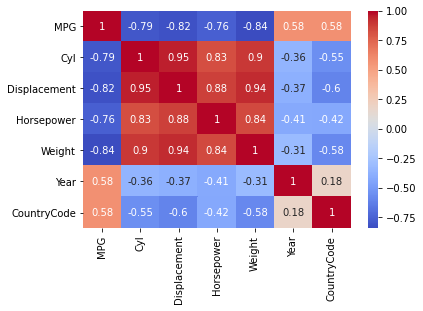

In [7]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

# 機械学習を実行しよう

決定係数_train：0.8267136584355985
決定係数_test：0.8251365779446636
RMSE_train:3.2394515037529947
RMSE_test:3.328161039643763


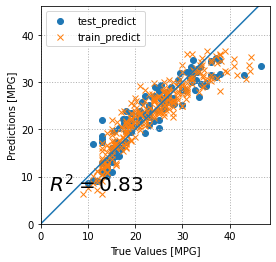

In [8]:
# SVR
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 入力データと正解ラベルに分割
data = np.array(df)    # Numpy配列に変換
X = data[:,1:]
y = data[:,0]

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# サポートベクターマシンによる学習
model = svm.SVR(C=1.0, kernel='linear', epsilon=0.1)    # 正則化パラメータ=1, 線形カーネルを使用
model.fit(X_train, y_train)                             # フィッティング

# 決定係数
r2_train = model.score(X_train, y_train)  
r2_test = model.score(X_test, y_test)
print("決定係数_train：" + str(r2_train))
print("決定係数_test：" + str(r2_test))

# 学習済みモデルを利用した予測値
y_pre_train = model.predict(X_train)    # 学習データでの予測
y_pre_test = model.predict(X_test)      # テストデータでの予測

# RMSEの計算
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pre_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pre_test))

print("RMSE_train:" + str(RMSE_train))
print("RMSE_test:" + str(RMSE_test))

# グラフ描画
plt.grid(linestyle='dotted', linewidth=1)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.scatter(y_test, y_pre_test, label='test_predict', lw=1, marker="o")
plt.scatter(y_train, y_pre_train, label='train_predict', lw=1, marker="x")
plt.legend()
plt.text(0.5, 7, '$\ R^{2}=$' + str(round(r2_test, 2)), fontsize=20)
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()